# Исследование рынка компьютерных игр

### План работы  
1. Первчиное знакомство с данными: ознакомление с составом трёх таблиц, количеством пропусков, выявление дублей

2. Подготовка данных к работе 
- Замена названий столбцов;
- Преобразование данных в нужные типы;
- Обработка пропусков при необходимости; 
- Подсчёт суммарных продаж во всех регионах в отдельном столбеце

    
3. Проведение исследовательского анализа данных, описание и визуализация данных:  

- Количество игр, которые выпускались в разные годы.  
- Построение распределения продаж игр по годам для платформ с наибольшими суммарными продажами.  
- Выявление актуального периода, для построения прогноза на 2017 год.  
- Выявление платформ, которые лидируют по продажам, растут или падают.  
- Построение график «ящик с усами» по глобальным продажам игр в разбивке по платформам, описание графика.  
- Построение диаграммы рассеяния и подсчёт корреляции между отзывами и продажами.   
- Изучение на общего распределения игр по жанрам.  
  

 
4. Составление портрета пользователя каждого региона.    
Определение для пользователя каждого региона:  
- Самые популярные платформы (топ-5), опишисания различия в долях продаж.  
- Самые популярные жанры (топ-5), пояснение разницы.  
- Вычисление влияния рейтинга ESRB на продажи в отдельном регионе  


5. Проверка гипотез:    
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  

6. Формулировка выводов по проведённому исследованию  

### Откройте файл с данными и изучите общую информацию

In [1]:
#импорт библиотек
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
import seaborn as sns
from math import sqrt
from scipy import stats as st
np.random.seed(0)



In [2]:
pd.set_option('display.max_columns', 50) 
pth1 = '/datasets/games.csv'
pth2 = 'games.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, sep=',')
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, sep=',')
else:
    print('Something is wrong')

In [3]:
display(data.head(10))
data.info()

display(data.isna().sum())
display(data.duplicated().sum())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

0

Было проведено ознакомление с составом таблицы. В ней находится 16715 записей об играх по следующим столбцам:  
— название игры  
— платформа  
— год выпуска  
— жанр игры  
— продажи в Северной Америке (миллионы проданных копий)  
— продажи в Европе (миллионы проданных копий)  
— продажи в Японии (миллионы проданных копий)  
— продажи в других странах (миллионы проданных копий)   
— оценка критиков (максимум 100)  
— оценка пользователей (максимум 10)  
— рейтинг от организации ESRB   

Проверка на дубли не дала результатов.  
Проверка на пропуски выявила пропущенные значения в следующих столбцах:    
Name - 2  
Year_of_Release - 269  
Genre - 2  
Critic_Score - 8578  
User_Score - 6701  
Rating - 6766      

### Подготовьте данные

In [4]:
#приведение к нижнему регистру названия столбцов
data.columns = data.columns.str.lower()
display(data.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#подсчёт пропусков в столбце year_of_release
print(len(data[data['year_of_release'].isna()]) / len(data)*100)


1.609332934489979


Пропущено 1.6% значений. Восстановить значения по значениям из других столбцов невозможно. Количество пропусков незначительно. 
Удалим строки с пропусками, т.к. нам важны записи с известной дата релиза для изучения динамики рынка по годам.


In [6]:
data = data.loc[~data['year_of_release'].isna()]
data['year_of_release'] = data['year_of_release'].astype('int64')
print(len(data[data['year_of_release'].isna()]) / len(data)*100)

0.0


In [7]:
#работа с пропусками в столбце user_score
data.loc[data['user_score'] == "tbd", 'user_score'] = np.nan


TBD - означает, что на момент сбора информации игра ещё не была оценена. Воспринимаем как отсутствие значения, заменяем на NaN

In [8]:
#изменение типа данных в столбце user_score
data['user_score'] = data['user_score'].astype('float')
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [9]:
#замена рейтина RP на значение NaN
data.loc[data['rating'] == 'RP', 'rating'] = np.nan

data['rating'].unique()
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

In [10]:
print(data['user_score'].isna().mean()*100)
print(data['critic_score'].isna().mean()*100)
print(data['rating'].isna().mean()*100)

54.62118448254895
51.45932141554177
40.61169889334793


In [11]:
# код ревьюера
data['user_score'].isna().mean()*100

54.62118448254895

Большое количество пропусков в столбах с пользовательской оценкой, оценкой критиков и рейтингом. Восстановить данные по инфоормации из соседниз столбцов невозможно. Оставляем неизменными

In [12]:
#работа с пропусками в столбце name
data.loc[data['name'].isna()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего две строки с отсутствующими значеними в столбце с названием игры. К тому же, в этих строках отсутствуют значения в большинстве остальных столбцов. Можем удалить без ущерба распределению по остальным характеристикам продаж игр.

In [13]:
#удаление строки с пропусками в столбце name
data = data.loc[~data['name'].isna()]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
#выявление неявных дубликатов
display(data[data[['name', 'platform', 'year_of_release']].duplicated()])
data = data.drop(index= 16230)

display(data.query('name == "Madden NFL 13"'))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


Был обнаружен и удалён один неявный дубликат

In [16]:
#добавление столбца с подсчётом суммарных продаж во всех регионах
data['sum_sales']=data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Была проведена подготовка данных к исследованию:  
    - названия столбцов приведены к нижнему регистру написания  
    - был добавлен столбец sum_sales с рассчётом суммарных продаж игр во всех регионах  
    - изменены типы данных в столбцах user_score,   
    - выявлены пропуски. Больше всего пропусков в столбцах с пользовательской оценкой (55%), оценкой критиков (51%) и рейтингом игры(40%) - их невозможно восполнить, столбцы оставлены без изменений. 1.6% значений пропущено в столбце года выпуска - оставлены без изменений.  
    - удалены 2 строки с пропущенными значениями в столбце с названием игр    
    - заменены значения tbd в столбце user_score и RP в столбце rating на отстутствующие значения NaN    
    


### Проведите исследовательский анализ данных

Рассмотрим каждый столбец в отдельности

In [17]:
#называния игр
print(len(data['platform'].unique()))


31


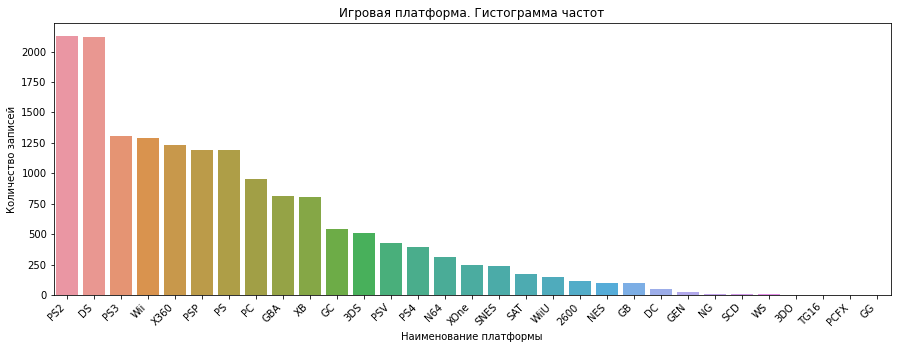

In [18]:
#формируем функцию для визуализации распределения по каждому параметру
#распределение по игровым платформам

plt.figure(figsize=(15,5))
ax = sns.countplot(data = data, x = data['platform'], order = data['platform'].value_counts().index)

ax.set_title('Игровая платформа. Гистограмма частот') 
plt.xlabel('Наименование платформы')
plt.ylabel('Количество записей')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')   
plt.show()

In [19]:
display(data['platform'].describe(), round(data['platform'].value_counts() / len(data) * 100, 1))


count     16443
unique       31
top         PS2
freq       2127
Name: platform, dtype: object

PS2     12.9
DS      12.9
PS3      7.9
Wii      7.8
X360     7.5
PSP      7.3
PS       7.2
PC       5.8
GBA      4.9
XB       4.9
GC       3.3
3DS      3.1
PSV      2.6
PS4      2.4
N64      1.9
XOne     1.5
SNES     1.5
SAT      1.1
WiiU     0.9
2600     0.7
NES      0.6
GB       0.6
DC       0.3
GEN      0.2
NG       0.1
SCD      0.0
WS       0.0
3DO      0.0
TG16     0.0
PCFX     0.0
GG       0.0
Name: platform, dtype: float64

Всего в таблице 31 уникальная игровая платформа.  
В топ 5 самых часто встречающихся платформ входят: PS2 (12.9%), DS (12.9%), PS3 (8.0%), Wii (7.9%), X360 (7.6%).   


In [20]:
#год выпуска игры
display(data['year_of_release'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))
display(round(data['year_of_release'].value_counts() / len(data) * 100, 1).head(20))
display(round(data['year_of_release'].value_counts() / len(data) * 100, 1).sum())

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
5%        1996.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
95%       2015.000000
99%       2016.000000
max       2016.000000
Name: year_of_release, dtype: float64

2008    8.7
2009    8.7
2010    7.6
2007    7.3
2011    6.9
2006    6.1
2005    5.7
2002    5.0
2003    4.7
2004    4.6
2012    4.0
2015    3.7
2014    3.5
2013    3.3
2016    3.1
2001    2.9
1998    2.3
2000    2.1
1999    2.1
1997    1.8
Name: year_of_release, dtype: float64

99.99999999999997

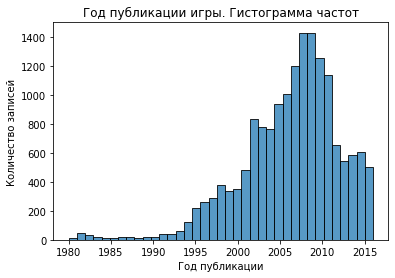

In [21]:
#год публикации
ax = sns.histplot(data['year_of_release'], bins=37)

ax.set_title('Год публикации игры. Гистограмма частот') 
plt.xlabel('Год публикации')
plt.ylabel('Количество записей')


plt.show()



<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Очень хорошо, что подписываешь графики и оси! </div>

Больше всего игр было выпущено в следующие годы:     
2008 - 8.5%  
2009 - 8.5%  
2010 - 7.5%  
2007 - 7.2%  
2011 - 6.8%    
99% игр был выпущен с 1996 по 2016 год - игры выпущенные раньше можем не включать в рассмотрение.      
Заметно, что количество игр, выпущенных после 2011 года упало. Это можем связать с началом распространения мобильных игр, которые не были включены данную базу данных.

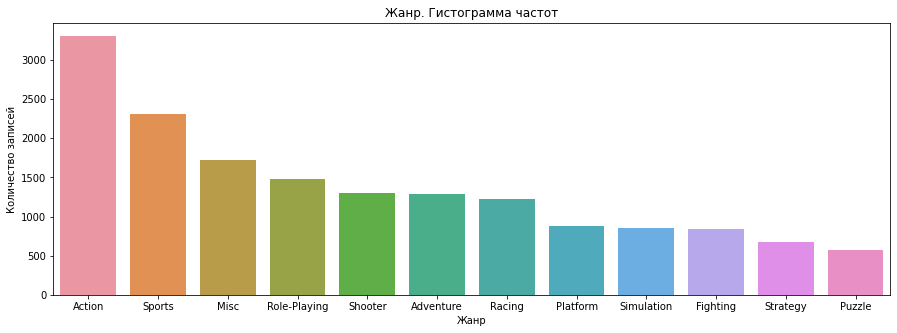

In [22]:
#жанр
plt.figure(figsize=(15,5))
ax = sns.countplot(data = data, x = data['genre'], order = data['genre'].value_counts().index)

ax.set_title('Жанр. Гистограмма частот') 
plt.xlabel('Жанр')
plt.ylabel('Количество записей')

 
plt.show()


In [23]:
display(data['genre'].describe(), round(data['genre'].value_counts() / len(data) * 100, 1))

count      16443
unique        12
top       Action
freq        3307
Name: genre, dtype: object

Action          20.1
Sports          14.0
Misc            10.5
Role-Playing     9.0
Shooter          7.9
Adventure        7.9
Racing           7.5
Platform         5.3
Simulation       5.2
Fighting         5.1
Strategy         4.1
Puzzle           3.5
Name: genre, dtype: float64

Всего уникальных жанров - 12. Топ 5 жанров:    
Action - 20.2%  
Sports - 14.0%  
Misc - 10.5%  
Role-Playing - 9.0%  
Shooter - 7.9%         
Наименьшей популярностью пользуются следующие жанры:    
Fighting - 5.1%  
Strategy - 4.1%  
Puzzle - 3.5 %     

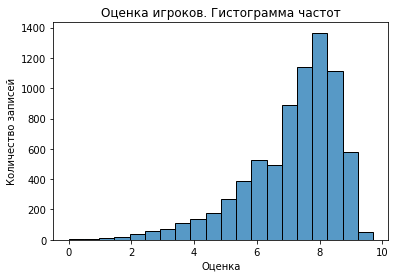

In [24]:
#оценка игроков

ax = sns.histplot(data['user_score'], bins=20)

ax.set_title('Оценка игроков. Гистограмма частот') 
plt.xlabel('Оценка')
plt.ylabel('Количество записей')


plt.show()

In [25]:
display(data['user_score'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))
display(round(data['user_score'].value_counts() / len(data) * 100, 1).head(10))
display(round(data['user_score'].value_counts() / len(data) * 100, 1).sum())
display(len(data.query('user_score < 4.1 | user_score > 9.2')) / len(data))

count    7462.000000
mean        7.126548
std         1.499429
min         0.000000
5%          4.100000
25%         6.400000
50%         7.500000
75%         8.200000
95%         8.900000
99%         9.200000
max         9.700000
Name: user_score, dtype: float64

7.8    2.0
8.0    1.7
8.2    1.7
8.3    1.5
7.5    1.5
8.5    1.5
7.9    1.5
8.1    1.4
7.7    1.4
7.3    1.4
Name: user_score, dtype: float64

44.89999999999999

0.025299519552393117

45% оценок пользователей выше 7 баллов.  
Средняя оценка = 7.1  
Медианная оценка = 7.5    
Медиана и среднее близки, значит выбросов мало.  
Большиство оценок ходится в промежутке от 4.1 до 9.2. Оценки вне этого диапозона можем считать аномальными.   
Распределение близко к нормальному со скосом влево.  
Выбросы составляют 2.5%. Будем учитывать в будущих вычислениях. Пока оставляем без изменения.

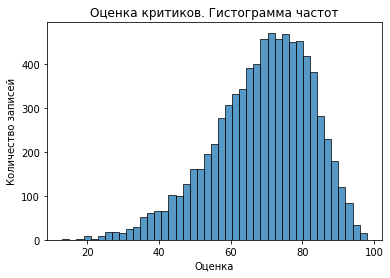

In [26]:
#оценка критиков

ax = sns.histplot(data['critic_score'], bins=43)

ax.set_title('Оценка критиков. Гистограмма частот') 
plt.xlabel('Оценка')
plt.ylabel('Количество записей')


plt.show()

In [27]:
display(data['critic_score'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))
display(round(data['critic_score'].value_counts() / len(data) * 100, 1).head(10))
display(round(data['critic_score'].value_counts() / len(data) * 100, 1).sum())
display(len(data.query('critic_score < 43 | critic_score > 94')) / len(data))

count    7982.000000
mean       68.992608
std        13.920049
min        13.000000
5%         43.000000
25%        60.000000
50%        71.000000
75%        79.000000
95%        89.000000
99%        94.000000
max        98.000000
Name: critic_score, dtype: float64

70.0    1.5
71.0    1.5
75.0    1.5
80.0    1.4
73.0    1.4
78.0    1.4
76.0    1.4
72.0    1.4
74.0    1.4
77.0    1.3
Name: critic_score, dtype: float64

48.4

0.025421151857933467

48.4% оценок пользователей выше 70 баллов.  
Средняя оценка = 69  
Медианная оценка = 71  
Медиана и среднее близки, значит что выбросов мало.  
Большиство оценок ходится в промежутке от 43 до 94. Оценки вне этого диапозона можем считать аномальными.  
Распределение близко к нормальному со скосом влево.  
Выбросы составляют 2.5%. Будем учитывать в будущих вычислениях. Пока оставляем без изменения.

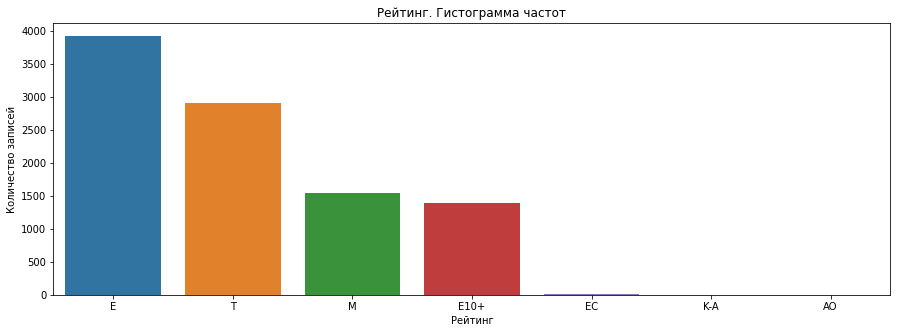

In [28]:
#рейтинг

plt.figure(figsize=(15,5))
ax = sns.countplot(data = data, x = data['rating'], order = data['rating'].value_counts().index)

ax.set_title('Рейтинг. Гистограмма частот') 
plt.xlabel('Рейтинг')
plt.ylabel('Количество записей')


plt.show()

In [29]:
display(data['rating'].describe(), round(data['rating'].value_counts() / len(data) * 100, 3))

count     9766
unique       7
top          E
freq      3920
Name: rating, dtype: object

E       23.840
T       17.667
M        9.341
E10+     8.472
EC       0.049
K-A      0.018
AO       0.006
Name: rating, dtype: float64

In [30]:
#замена устаревших рейтингов актуальным
data.loc[(data['rating'] == 'EC') | (data['rating'] == 'K-A'), 'rating'] = 'E'

Всего 7 типов рейтингов. Из них чаще всего встречаются:    
E («Для всех») - 23.874%  
T («Подросткам») - 17.717%  
M («Для взрослых») - 9.352%     
Была произведена замена устаревших рейтингов EC и K-A на рейтинг Е.    
С рейтингом AO всего одна запись.

In [31]:
#количество продаж в Северной Америке


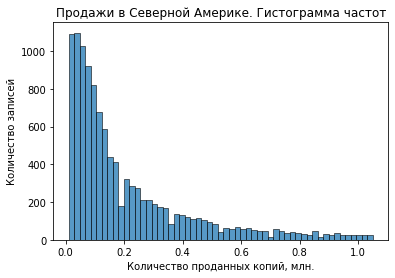

In [32]:
ax = sns.histplot(data.loc[(data['na_sales'] > 0) & (data['na_sales'] < 1.06), 'na_sales'], bins=55)

ax.set_title('Продажи в Северной Америке. Гистограмма частот') 
plt.xlabel('Количество проданных копий, млн.')
plt.ylabel('Количество записей')


plt.show()

In [33]:
display(data.loc[(data['na_sales'] > 0), 'na_sales'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))
display(round(data.loc[(data['na_sales'] > 0), 'na_sales'].value_counts() / len(data) * 100, 1).head(10))
display(round(data.loc[(data['na_sales'] > 0), 'na_sales'].value_counts() / len(data) * 100, 1).sum())
display(len(data.query('na_sales < 0.02 | na_sales > 3.27')) / len(data))

count    11995.000000
mean         0.361936
std          0.939536
min          0.010000
5%           0.020000
25%          0.060000
50%          0.140000
75%          0.340000
95%          1.350000
99%          3.270600
max         41.360000
Name: na_sales, dtype: float64

0.02    3.4
0.03    3.4
0.04    3.3
0.05    3.3
0.01    3.2
0.06    3.0
0.07    2.9
0.08    2.7
0.09    2.6
0.10    2.4
Name: na_sales, dtype: float64

69.69999999999999

0.310040746822356

Рассмотрим продажи в Северной Америке.  
График распределения продаж сильно скошен вправо и напоминает распределение Пуассона.    
Не рассматривая нулевые продажи, вычисляем значения количества проданных копий:    
Среднее значение = 0.36 млн.   
Медианное значение = 0.14 млн.   
Разборс между средним и медианным значеним велик, значит в выборке присутствуют сильные выборсы. Для анализа рынка не будем избавляться от них.    
Значения вне диапозона от 0.02 млн до 3.27 считаем аномальными.  
Выбросов больше 30%.  Пока оставляем неизменными.

In [34]:
#количество продаж в Европе

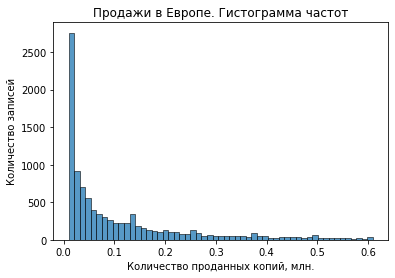

In [35]:
ax = sns.histplot(data.loc[(data['eu_sales'] > 0) & (data['eu_sales'] < 0.62), 'eu_sales'], bins=55)

ax.set_title('Продажи в Европе. Гистограмма частот') 
plt.xlabel('Количество проданных копий, млн.')
plt.ylabel('Количество записей')


plt.show()

In [36]:
display(data.loc[(data['eu_sales'] > 0), 'eu_sales'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))
display(round(data.loc[(data['eu_sales'] > 0), 'eu_sales'].value_counts() / len(data) * 100, 1).head(10))
display(round(data.loc[(data['eu_sales'] > 0), 'eu_sales'].value_counts() / len(data) * 100, 1).sum())
display(len(data.query('eu_sales < 0.01 | eu_sales > 2.36')) / len(data))

count    10677.000000
mean         0.224751
std          0.614608
min          0.010000
5%           0.010000
25%          0.020000
50%          0.070000
75%          0.200000
95%          0.900000
99%          2.362400
max         28.960000
Name: eu_sales, dtype: float64

0.01    8.9
0.02    7.8
0.03    5.5
0.04    4.3
0.05    3.4
0.06    2.4
0.07    2.1
0.08    1.9
0.09    1.6
0.12    1.4
Name: eu_sales, dtype: float64

62.29999999999999

0.35717326521924225

Рассмотрим продажи в Европе.
График распределения продаж сильно скошен вправо.   
Не рассматривая нулевые продажи, вычисляем значения количества проданных копий:    
Среднее значение = 0.22 млн.   
Медианное значение = 0.07 млн.   
Разборс между средним и медианным значеним велик, значит в выборке присутствуют сильные выборсы. Для анализа рынка не будем избавляться от них.    
Значения вне диапозона от 0.01 млн до 2.36 считаем аномальными, их больше 30%. 

In [37]:
#количество продаж в Японии

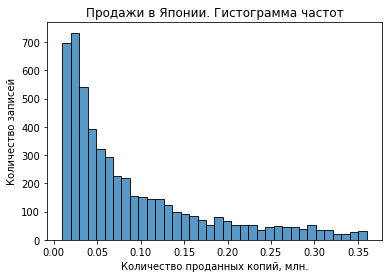

In [38]:
ax = sns.histplot(data.loc[(data['jp_sales'] > 0) & (data['jp_sales'] < 0.37), 'jp_sales'], bins=36)

ax.set_title('Продажи в Японии. Гистограмма частот') 
plt.xlabel('Количество проданных копий, млн.')
plt.ylabel('Количество записей')


plt.show()

In [39]:
display(data.loc[(data['jp_sales'] > 0), 'jp_sales'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))
display(round(data.loc[(data['jp_sales'] > 0), 'jp_sales'].value_counts() / len(data) * 100, 1).head(10))
display(round(data.loc[(data['jp_sales'] > 0), 'jp_sales'].value_counts() / len(data) * 100, 1).sum())
display(len(data.query('jp_sales < 0.01 | jp_sales > 2.43')) / len(data))

count    6144.000000
mean        0.210065
std         0.481057
min         0.010000
5%          0.010000
25%         0.030000
50%         0.070000
75%         0.190000
95%         0.830000
99%         2.430000
max        10.220000
Name: jp_sales, dtype: float64

0.02    4.5
0.01    4.2
0.03    3.3
0.04    2.4
0.05    2.0
0.06    1.8
0.07    1.4
0.08    1.3
0.09    0.9
0.10    0.9
Name: jp_sales, dtype: float64

35.0

0.6300553426990209

Рассмотрим продажи в Японии
График распределения продаж сильно скошен вправо.   
Не рассматривая нулевые продажи, вычисляем значения количества проданных копий:    
Среднее значение = 0.21 млн.   
Медианное значение = 0.07 млн.   
Разборс между средним и медианным значеним велик, значит в выборке присутствуют сильные выборсы. Для анализа рынка не будем избавляться от них.    
Значения вне диапозона от 0.01 млн до 2.43 считаем аномальными, их больше 60%.

In [40]:
#количество продаж в остальных регионах

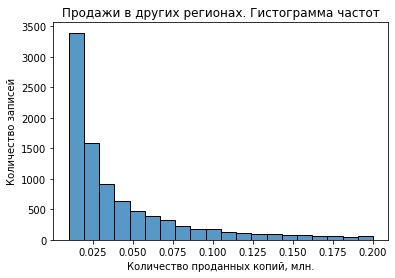

In [41]:
ax = sns.histplot(data.loc[(data['other_sales'] > 0) & (data['other_sales'] < 0.21), 'other_sales'], bins=20)

ax.set_title('Продажи в других регионах. Гистограмма частот') 
plt.xlabel('Количество проданных копий, млн.')
plt.ylabel('Количество записей')


plt.show()

In [42]:
display(data.loc[(data['other_sales'] > 0), 'other_sales'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))
display(round(data.loc[(data['other_sales'] > 0), 'other_sales'].value_counts() / len(data) * 100, 1).head(10))
display(round(data.loc[(data['other_sales'] > 0), 'other_sales'].value_counts() / len(data) * 100, 1).sum())
display(len(data.query('other_sales < 0.01 | other_sales > 0.85')) / len(data))

count    9952.000000
mean        0.078640
std         0.236567
min         0.010000
5%          0.010000
25%         0.010000
50%         0.020000
75%         0.070000
95%         0.280000
99%         0.850000
max        10.570000
Name: other_sales, dtype: float64

0.01    20.7
0.02     9.7
0.03     5.5
0.04     3.9
0.05     2.9
0.06     2.4
0.07     2.0
0.08     1.4
0.09     1.1
0.10     1.0
Name: other_sales, dtype: float64

59.0

0.40077844675545826

Рассмотрим продажи в других регионах.
График распределения продаж сильно скошен вправо.   
Не рассматривая нулевые продажи, вычисляем значения количества проданных копий:    
Среднее значение = 0.08 млн.   
Медианное значение = 0.02 млн.   
Разборс между средним и медианным значеним велик, значит в выборке присутствуют сильные выборсы. Для анализа рынка не будем избавляться от них.    
Значения вне диапозона от 0.01 млн до 0.83 считаем аномальными, их больше 40%.

# Проанализируем продажи игра на актуальных платформ

In [43]:
display(data.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [44]:
#создаём таблицу с продажами топ-10 платформ
top_platforms = data.groupby('platform')['sum_sales'].agg('sum').sort_values(ascending=False).reset_index().head(10) 
display(top_platforms)


,platform,sum_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Проведём анализ циклов жизни для топ-10 платформ. В предыдущей части выявили, что большинство игр было выпущено после 1996 года.

In [45]:
#создаём сводную таблицу с суммарными продажами для каждой платформы по годам
data_top_platforms = data.query('year_of_release >= 1996').groupby(['platform','year_of_release'])['sum_sales'].agg('sum').reset_index()
#создаём список с названиями игр
list_platforms = top_platforms['platform'].tolist()
display(data_top_platforms)

data_top_platforms.info()
print(list_platforms)

,platform,year_of_release,sum_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
174,XB,2008,0.18
175,XOne,2013,18.96
176,XOne,2014,54.07
177,XOne,2015,60.14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         179 non-null    object 
 1   year_of_release  179 non-null    int64  
 2   sum_sales        179 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.3+ KB
['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']


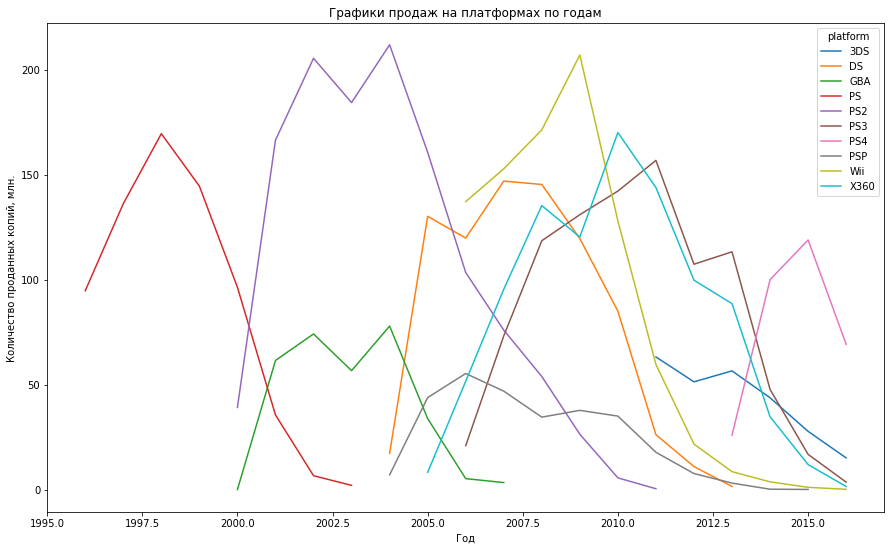

In [46]:

plt.figure(figsize=(15,9))
sns.lineplot(data=data_top_platforms.query('platform in @list_platforms'), 
             x = 'year_of_release', 
             y = 'sum_sales',
             hue='platform',
             markers=True,
             )

plt.title('Графики продаж на платформах по годам')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, млн.')


plt.show()

По графикам видно, что период популярности платформ  можно оценить в промежутке от 5 до 10 лет.

In [47]:
#найдём актуальные на 2016 год платформы
now_platforms = data.query('year_of_release == 2016')
now_platforms = now_platforms['platform'].unique()
display(now_platforms)

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

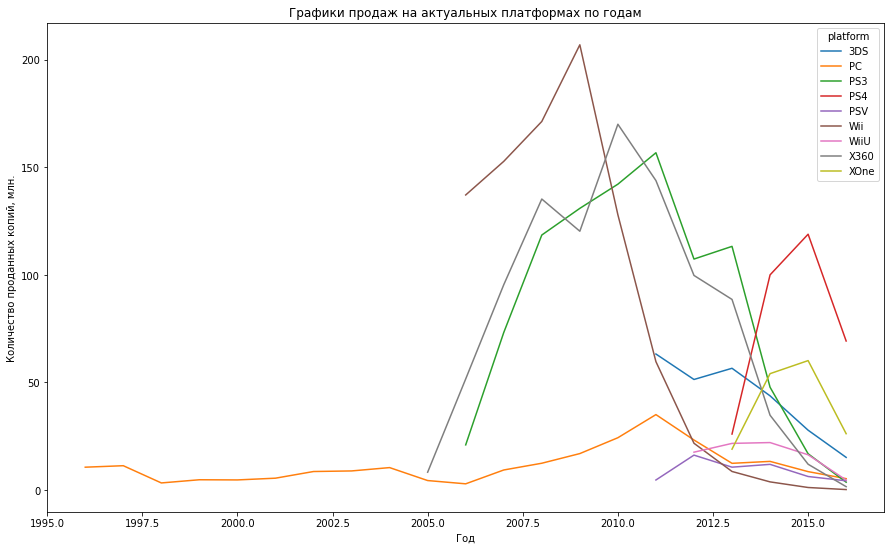

In [48]:
plt.figure(figsize=(15,9))
sns.lineplot(data=data_top_platforms.query('platform in @now_platforms'), 
             x = 'year_of_release', 
             y = 'sum_sales',
             hue='platform',
             markers=True,
             )

plt.title('Графики продаж на актуальных платформах по годам')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, млн.')


plt.show()

Видим по графику что большинство акутальных платформ активно продвигались с 2013 по 2016 год.  
Так как рынок игр развивается динамично, необходимо взять актуальный срок рассмотрения, который бы с одной стороны продемонстрировал, в каком состоянии находятся платформы на рынке - рост и или падение. С другой стороны, позволил бы изолировать и продемонстрировать, как проявляют себя именно актуальные на 2016 год платформы.  
2016 год - момент, из которого мы смотрим на историю рынка, есть риск, что мы из этой точки времени не обладаем полнотой данных по 2016 году. Поэтому возьмём трёхлетний период рассмотрения продаж с 2013 года.  

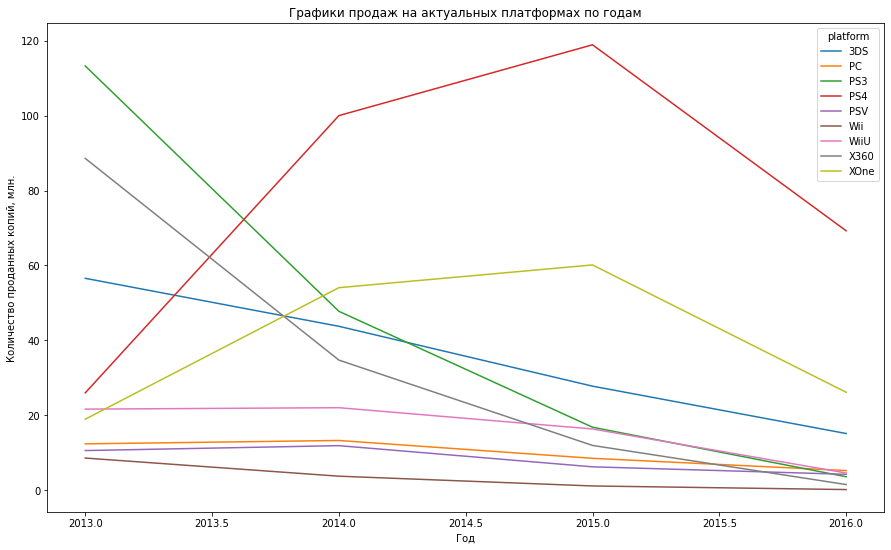

In [49]:
plt.figure(figsize=(15,9))
sns.lineplot(data=data_top_platforms.query('platform in @now_platforms and year_of_release > 2012'), 
             x = 'year_of_release', 
             y = 'sum_sales',
             hue='platform',
             markers=True,
             )

plt.title('Графики продаж на актуальных платформах по годам')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, млн.')


plt.show()

In [50]:
display(data_top_platforms.query('year_of_release == 2016').sort_values(by='sum_sales',ascending=False))

,platform,year_of_release,sum_sales
108,PS4,2016,69.25
178,XOne,2016,26.15
5,3DS,2016,15.14
72,PC,2016,5.25
153,WiiU,2016,4.60
126,PSV,2016,4.25
104,PS3,2016,3.60
165,X360,2016,1.52
148,Wii,2016,0.18


Возьмём к рассмотрению 5 платформ с самыми крупными продажами на 2016 год: 'PS4', '3DS', 'XOne', 'WiiU', 'PC'

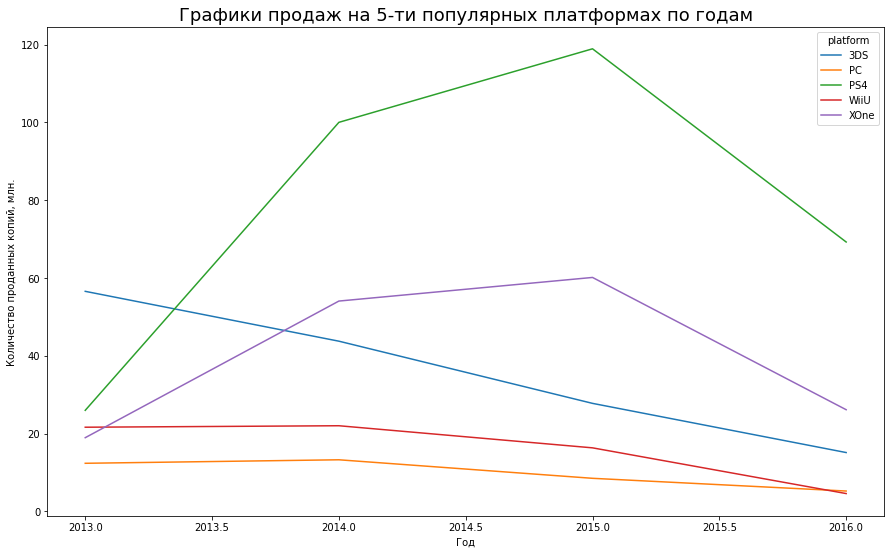

In [51]:
now_platforms = ['PS4', '3DS', 'XOne', 'WiiU', 'PC']
platforms_top_now = data_top_platforms.query('platform in @now_platforms and year_of_release > 2012')
plt.figure(figsize=(15,9))
sns.lineplot(data=platforms_top_now, 
             x = 'year_of_release', 
             y = 'sum_sales',
             hue='platform',
             markers=True,
             )

plt.title('Графики продаж на 5-ти популярных платформах по годам', fontsize=18)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, млн.')


plt.show()

Проанализировав графики можем заметить следующие тенденции:  
    1) К 2016 году видим падение продаж на всех платформах. Связываем это с тем, что сам момент сбор информации проходил в 2016 году, большинство данных об играх ещё не были доступны. Поэтому будем учитывать динамику только по пердыдущим годам.  
    2) с 2013 по 2015 год активно росли продажи игр на платформах PS4 и XOne.  
    3) Падение в продажах игр испытывают на себе следующие платформы :  
        3DS - резкое снижение с 2013 года с отметки в 60 млн. копий   
        WiiU - медленное снижение с 2013 года с отметки в 20 млн. копий     
    4) На платформе PC заметно снижение продаж с 2011 года, с 2014 года падение замедляется на уровне 10 млн. копий.  
    5) Отметим, что за всю историю платформа PC является самой стаблиной платформой для продаж, не уходила с рынка и история продаж демонстрирует время от времени подъёмы в продажах.  
    
        

In [52]:
data_now=data.query('year_of_release > 2012')
five_platforms = data_now.query('platform in @now_platforms')

display(five_platforms) #5 актуальных на 2016 год платформ
display(data_top_platforms) #10 платформ с лучшими продажами с 1996 года
display(data_now) #продажи в актуальны период с 2010 года

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


,platform,year_of_release,sum_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
174,XB,2008,0.18
175,XOne,2013,18.96
176,XOne,2014,54.07
177,XOne,2015,60.14


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


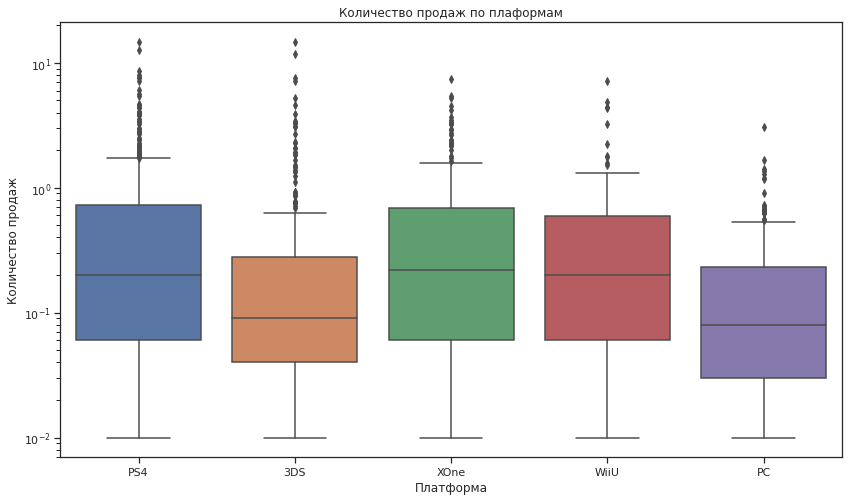

In [53]:
#построение графиков "Ящик с усами" для 5 актуальных платформ
plt.figure(figsize=(14,8))
sns.set(style="ticks")
ax = sns.boxplot(data = five_platforms, x='platform', y='sum_sales')
ax.set_title('Количество продаж по плаформам')
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество продаж')
ax.set(yscale="log")


plt.show()
# разброс данных велик, пользуемся логарифмическим видом для лучшего считывания графиков

In [54]:
display(five_platforms.groupby('platform')['sum_sales'].median().sort_values(ascending=False))

platform
XOne    0.22
PS4     0.20
WiiU    0.20
3DS     0.09
PC      0.08
Name: sum_sales, dtype: float64

Видимо, что медианные значения количества продаж близки по платформам PS4, XOne, WiiU. У PC самая низкая медиана продаж.

In [55]:
#проанализируем столбец общих продаж для вычисления аномалий

display(five_platforms['sum_sales'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))
display(len(five_platforms.query('sum_sales < 0.01 | sum_sales > 5.74')) / len(five_platforms))

count    1246.000000
mean        0.578467
std         1.282996
min         0.010000
5%          0.010000
25%         0.040000
50%         0.140000
75%         0.490000
95%         2.775000
99%         6.635500
max        14.630000
Name: sum_sales, dtype: float64

0.011235955056179775

Рассмотрим продажи на пяти платформах.  
Вычисляем значения количества проданных копий:  
Среднее значение = 0.57 млн.  
Медианное значение = 0.14 млн.  
Разборс между средним и медианным значеним велик, значит в выборке присутствуют сильные выборсы. Для анализа рынка не будем избавляться от них.  
Значения вне диапозона от 0.01 млн до 6.63 считаем аномальными, их всего 1%. 

In [56]:
print(round(len(five_platforms.loc[five_platforms['sum_sales'] >= (0.38-0.03)*1.5+0.38]) / len(five_platforms) * 100, 1))

15.5


Методом межквартильного размаха оценили верхнюю границу усов и рассчитали количество выборосов выше этой отметки. Оказалось, что их 15.5% - это ощутимое количество, но от них нельзя избавляться, т.к. это повлияет на адекватность анализа.

### Выводы по анализу продаж на различных платформах

## Влияние отзывов на продажи

In [57]:

platform_ps4 = data.loc[(data['platform'] == 'PS4') & (data['year_of_release'] > 2012)]
display(platform_ps4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


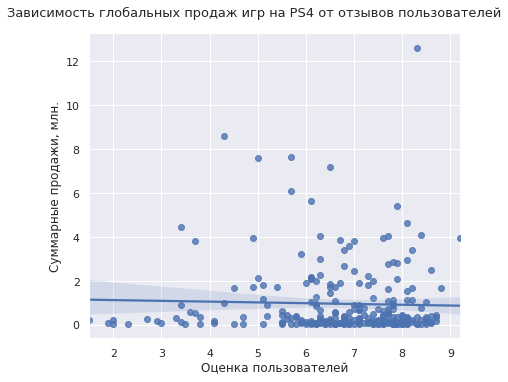

In [58]:


# возьмём срез данных по платформе ps4, сохраним его в переменной platform_ps4

sns.set()
ax = sns.pairplot(platform_ps4, x_vars=['user_score'], y_vars=['sum_sales'], height=5, aspect=1.2, kind="reg")
ax.fig.suptitle("Зависимость глобальных продаж игр на PS4 от отзывов пользователей", y=1.05, size=13)
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи, млн.')
plt.show()



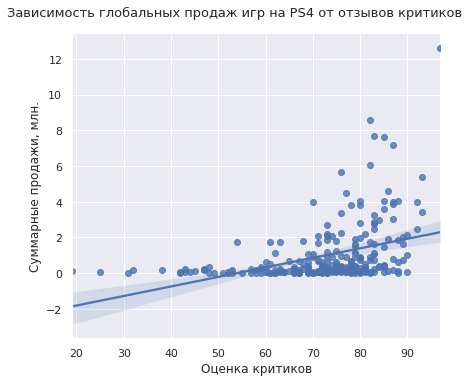

In [59]:
sns.set()
ax = sns.pairplot(platform_ps4, x_vars=['critic_score'], y_vars=['sum_sales'], height=5, aspect=1.2, kind="reg")
ax.fig.suptitle("Зависимость глобальных продаж игр на PS4 от отзывов критиков", y=1.05, size=13)
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи, млн.')
plt.show()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Оси у графиков тоже должны быть подписаны на языке проекта, то есть в нашем случае на русском. ✔</div>

Видим плавную положительную зависимость продаж от отзывов критиков, и отсутствие зависимости от отзывов пользователей

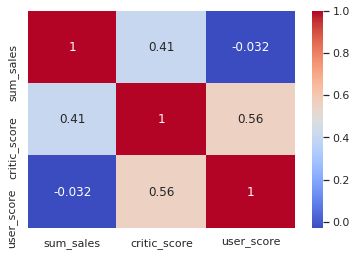

In [60]:
#сторим heatmap для выявления зависимости между оценками критиков, пользователей и количеством проданных копий
sns.heatmap(platform_ps4[['sum_sales', 'critic_score', 'user_score']].corr(), annot=True, cmap= 'coolwarm')
plt.show()

In [61]:
#ищем квартильные значения, вычисляем верхнюю границу "усов"
display(platform_ps4['sum_sales'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))
print(round(len(platform_ps4.loc[platform_ps4['sum_sales'] >= (0.73-0.06)*1.5+0.73]) / len(platform_ps4) * 100, 1))
print((0.73-0.06)*1.5+0.73)

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
5%         0.015500
25%        0.060000
50%        0.200000
75%        0.730000
95%        3.910500
99%        7.688800
max       14.630000
Name: sum_sales, dtype: float64

13.8
1.7349999999999999


Выбросов 14%. Граница верхних устов = 1.73 по методу МКР

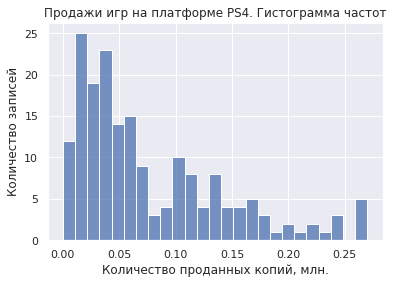

In [62]:
#выявим выбросы в суммарных продажах игр на PS4
ax = sns.histplot(platform_ps4.loc[(platform_ps4['sum_sales'] > 0.1) & (platform_ps4['sum_sales'] < 1.74), 'other_sales'], bins=25)

ax.set_title('Продажи игр на платформе PS4. Гистограмма частот') 
plt.xlabel('Количество проданных копий, млн.')
plt.ylabel('Количество записей')


plt.show()

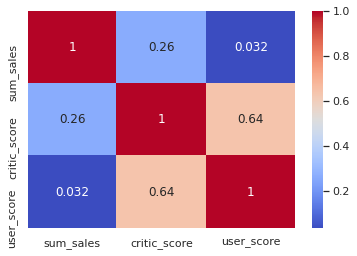

In [63]:
#сторим heatmap дез выбросов
sns.heatmap(platform_ps4
 .loc[platform_ps4['sum_sales'] <= 1.73][['sum_sales', 'critic_score','user_score']].corr(), annot=True, cmap= 'coolwarm')
plt.show()

Вычислили корреляцию до учёта и после учёта выборосов.  
Коэффициент корреляции критических отзывов и суммарных продаж равен 0.41 и 0.26 соответственно.  
Коэффициент корреляции пользовательских отзывов и суммарных продаж равен -0.032 и 0.032 соответственно.  
Это подтверждает наше наблюдение по графикам: пользовательские отзывы не влияют на продажи, критические отзывы влияют положительно, но слабо.  
    

In [64]:
#смотрим корреляцию по другим платформам
display(five_platforms)
display(five_platforms
 .groupby(['platform'])
 [['sum_sales','critic_score','user_score']]
 .agg('corr')
 .reset_index()
 .query('level_1 == "sum_sales"')
        
)
#находим корреляцию продаж от отзывов, смотрим на срез по суммарным продажам

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


,platform,level_1,sum_sales,critic_score,user_score
0,3DS,sum_sales,1.0,0.357057,0.241504
3,PC,sum_sales,1.0,0.196030,-0.093842
6,PS4,sum_sales,1.0,0.406568,-0.031957
9,WiiU,sum_sales,1.0,0.376415,0.419330
12,XOne,sum_sales,1.0,0.416998,-0.068925


Видим, что наблюдения за зависимостью критических отзывов обнаруживают при изучению продаж и на остальных платформах: коэффициент корреляции от 0.19 до 0.41.  
    В целом, отсутствие влияния пользовательских отзывов на продажи на других платформах тоже проявляется, в частности на платформах PC, PS4 и XBox One (от -0.00 до -0.01).   
    Однако явными исключениями являются платформы 3DS и WiiU - здесь проявилась положительная корреляция между продажами и отзывами игроков (0.24 и 0.42 соответственно). 
    Пользователи этих платформ перед покупкой игр сверяются не только с критиками, но и с мнением других игроков.

In [65]:
#влияние жанра на продажи
#сортируем жанры по убыванию медианы
show_genres = (five_platforms.groupby('genre')['sum_sales'].agg('median').sort_values(ascending=False))
display(show_genres)

genre
Shooter         0.495
Sports          0.275
Platform        0.260
Role-Playing    0.190
Fighting        0.155
Misc            0.120
Racing          0.120
Action          0.110
Simulation      0.100
Puzzle          0.085
Strategy        0.080
Adventure       0.060
Name: sum_sales, dtype: float64

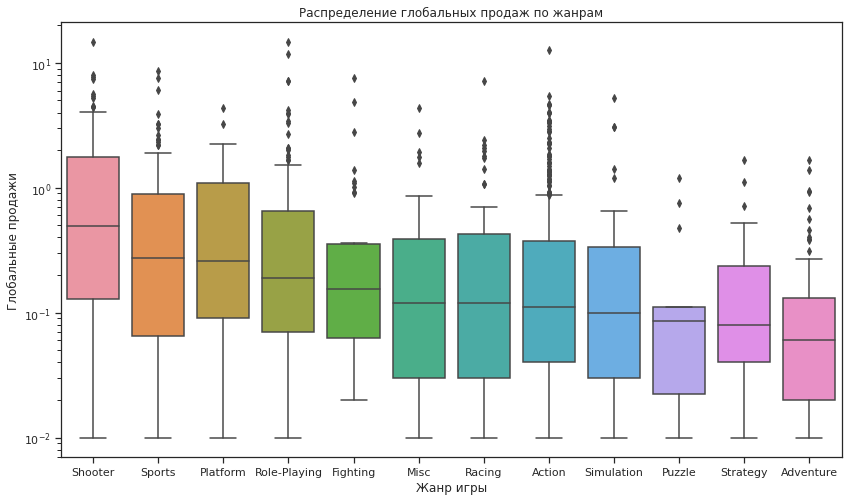

In [66]:
#построим графики ящик с усами для каждого жанра
plt.figure(figsize=(14,8))
sns.set(style="ticks")
ax = sns.boxplot(data=five_platforms, y="sum_sales", x='genre', order = show_genres.index)
ax.set_title('Распределение глобальных продаж по жанрам')
ax.set_xlabel('Жанр игры')
ax.set_ylabel('Глобальные продажи')
ax.set(yscale="log")
plt.show()

# Выводы по исследованию распределения продаж по платформам и жанрам

В данной части был проведён общий анализ продаж игр по годам, по платформам и по жанрам. Были выявлены следующие особенности:    
    1) 99% игр было продано с 1996 года. Соответственно, в дальнейших вычислениях был взят этот период для выявления трендов на рынке    
    2) Были построенны графики продаж игр по платформам, распределённые по годам. На графике было замечено, что цикл жизни игровых платформ составляет от 5 до 10 лет.    
    3) Была выявлена пятёрка актуальных на 2016 год платформ. По ним определили актуальный период для наблюдений за динамикой развития их продаж: с 2010 по 2015 год (3 года).    
    4) В пятёрку актуальных лидеров вошли следующие платформы: PS4, 3DS, XBox One, WiiU, PC. Среди них лидируют по продажам платформы PS4 и XBox One (они же демонстрируют положительную динамику на 2015 год), низкие продажи и стабильную отрицательную динамику демонстрирует платформа WiiU и 3DS. Важно наблюдение о платформе PC: несмотря на плавную отрицательную динамику в продажах, PC присутствует на рынке более 30-ти лет и является самой стабильной платформой для продаж из всех перечисленных.  
    5) Среди пятёрки топовых платформ самые высокие медианные продажи у платформ  PS4(0.2 млн), XBox One (0.22 млн) и WiiU (0.22 млн). Самая низкая - у PC (0.08 млн)  
    6) Для выявления закономерности влияния отзывов на количество продаж исследовали историю продаж игр на платформе PS4. Пользовательские отзывы не влияют на продажи (коэффициент корреляции 0.032), критические отзывы влияют положительно, но слабо (коэффициент корреляции 0.26).  
    7) Выявленная закономерность влияния отзывов на продажи закономерна и для остальных платформ. Исключениями стали отзывы игроков WiiU (корреляция 0.4) и 3DS (корреляция 0.22), где заметна положительная корреляция продаж от отзывов игроков.  
    8) Были рассмотрено распределение продаж по жанрам. Самые высокие медианные продажи демонстрирует жанр Shooter( 0.49 млн.), Platform и Sports (0.26 и 0.275 млн.), самые низкие медианные продажи - Strategy  и Adventure (0.08 и 0.06 млн.).  

### Составьте портрет пользователя каждого региона

In [67]:
#построим таблицу с данными о долях продаж каждой платформы по регионам
platform_region = data.loc[data['year_of_release'] > 2012].groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum').reset_index()


display(platform_region)
platform_region['na_sales'] = round(platform_region['na_sales'] / platform_region['na_sales'].sum() * 100, 2)
platform_region['eu_sales'] = round(platform_region['eu_sales'] / platform_region['eu_sales'].sum() * 100, 2)
platform_region['jp_sales'] = round(platform_region['jp_sales'] /platform_region['jp_sales'].sum() * 100, 2)
display(platform_region)

,platform,na_sales,eu_sales,jp_sales
0,3DS,38.20,30.96,67.81
1,DS,0.57,0.85,0.00
2,PC,11.11,25.36,0.00
3,PS3,63.50,67.81,23.35
4,PS4,108.74,141.09,15.96
5,PSP,0.00,0.17,3.29
6,PSV,5.04,6.10,18.59
7,Wii,6.56,5.93,0.05
8,WiiU,29.21,19.85,10.88
9,X360,81.66,42.52,0.51


,platform,na_sales,eu_sales,jp_sales
0,3DS,8.73,7.89,48.17
1,DS,0.13,0.22,0.00
2,PC,2.54,6.47,0.00
3,PS3,14.51,17.29,16.59
4,PS4,24.84,35.97,11.34
5,PSP,0.00,0.04,2.34
6,PSV,1.15,1.56,13.21
7,Wii,1.50,1.51,0.04
8,WiiU,6.67,5.06,7.73
9,X360,18.66,10.84,0.36


In [68]:
p_r_na = platform_region[["platform", "na_sales"]].sort_values(by="na_sales", ascending=False).head(5)
p_r_eu = platform_region[["platform", "eu_sales"]].sort_values(by="eu_sales", ascending=False).head(5)
p_r_jp = platform_region[["platform", "jp_sales"]].sort_values(by="jp_sales", ascending=False).head(5)

display(p_r_na) 
display(p_r_eu) 
display(p_r_jp) 



,platform,na_sales
4,PS4,24.84
10,XOne,21.27
9,X360,18.66
3,PS3,14.51
0,3DS,8.73


,platform,eu_sales
4,PS4,35.97
3,PS3,17.29
10,XOne,13.15
9,X360,10.84
0,3DS,7.89


,platform,jp_sales
0,3DS,48.17
3,PS3,16.59
6,PSV,13.21
4,PS4,11.34
8,WiiU,7.73


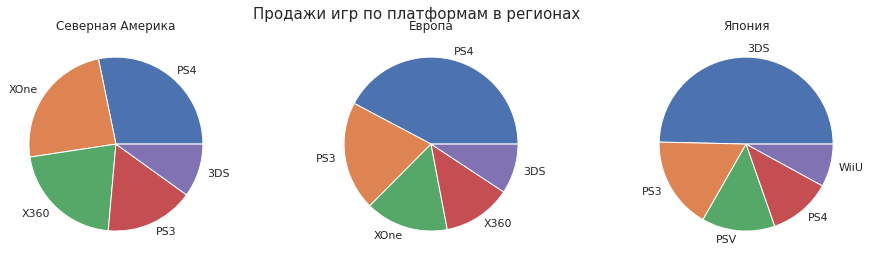

In [69]:
# Визуализируем портреты пользователей по продажам игр платформ
fig = plt.figure(figsize=(16,4))
fig.suptitle('Продажи игр по платформам в регионах', fontsize=15)
ax1 = plt.subplot(131)

plt.pie(p_r_na['na_sales'], labels=p_r_na['platform'])
ax1.set_title('Северная Америка')

ax2 = plt.subplot(132)
plt.pie(p_r_eu['eu_sales'], labels=p_r_eu['platform'])
ax2.set_title('Европа')

ax3 = plt.subplot(133)
plt.pie(p_r_jp['jp_sales'], labels=p_r_jp['platform'])
ax3.set_title('Япония')
plt.show()

Топ продаж игр следующих платформ мы видим в Северной Америке, Европе и Японии в период с 2013 по 2016 год:    
    X360 (30%), PS3(25%), 3DS(33%) соответственно.  
Низкие продажи игр следующих платформ мы видим в Северной Америке, Европе и Японии:  
    XOne (8%), Wii(8%), PSV(7%) соответственно.

In [70]:
#построим таблицу с данными о долях продаж каждого жанра по регионам
genre_region = data.loc[data['year_of_release'] > 2012].groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum').reset_index()

display(genre_region)
genre_region['na_sales'] = round(genre_region['na_sales'] / genre_region['na_sales'].sum() * 100, 2)
genre_region['eu_sales'] = round(genre_region['eu_sales'] / genre_region['eu_sales'].sum() * 100, 2)
genre_region['jp_sales'] = round(genre_region['jp_sales'] /genre_region['jp_sales'].sum() * 100, 2)
display(genre_region)



,genre,na_sales,eu_sales,jp_sales
0,Action,126.05,118.13,40.49
1,Adventure,7.14,8.25,5.82
2,Fighting,15.55,8.55,7.65
3,Misc,27.49,20.04,9.20
4,Platform,18.14,15.58,4.79
5,Puzzle,0.83,1.00,1.18
6,Racing,12.96,20.19,2.30
7,Role-Playing,46.40,36.97,51.04
8,Shooter,109.74,87.86,6.61
9,Simulation,4.86,10.92,4.52


,genre,na_sales,eu_sales,jp_sales
0,Action,28.80,30.12,28.76
1,Adventure,1.63,2.10,4.13
2,Fighting,3.55,2.18,5.43
3,Misc,6.28,5.11,6.54
4,Platform,4.14,3.97,3.40
5,Puzzle,0.19,0.25,0.84
6,Racing,2.96,5.15,1.63
7,Role-Playing,10.60,9.43,36.26
8,Shooter,25.07,22.40,4.70
9,Simulation,1.11,2.78,3.21


In [71]:
g_r_na = genre_region[["genre", "na_sales"]].sort_values(by="na_sales", ascending=False).head(5)
g_r_eu  = genre_region[["genre", "eu_sales"]].sort_values(by="eu_sales", ascending=False).head(5)
g_r_jp = genre_region[["genre", "jp_sales"]].sort_values(by="jp_sales", ascending=False).head(5)
display(g_r_na) 
display(g_r_eu) 
display(g_r_jp) 


,genre,na_sales
0,Action,28.80
8,Shooter,25.07
10,Sports,14.91
7,Role-Playing,10.60
3,Misc,6.28


,genre,eu_sales
0,Action,30.12
8,Shooter,22.40
10,Sports,15.43
7,Role-Playing,9.43
6,Racing,5.15


,genre,jp_sales
7,Role-Playing,36.26
0,Action,28.76
3,Misc,6.54
2,Fighting,5.43
8,Shooter,4.70


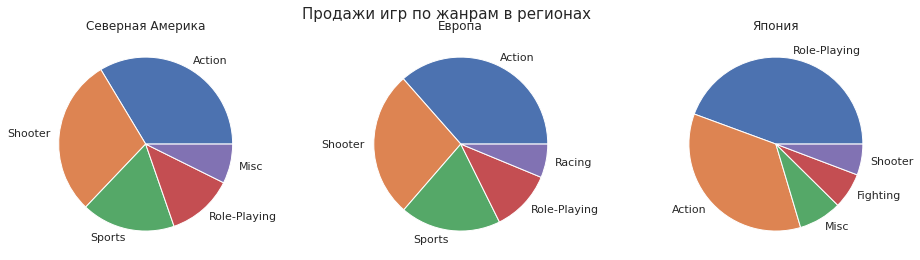

In [72]:
fig = plt.figure(figsize=(16,4))
fig.suptitle('Продажи игр по жанрам в регионах', fontsize=15)
ax1 = plt.subplot(131)

plt.pie(g_r_na['na_sales'], labels=g_r_na["genre"])
ax1.set_title('Северная Америка')

ax2 = plt.subplot(132)
plt.pie(g_r_eu['eu_sales'], labels=g_r_eu["genre"])
ax2.set_title('Европа')

ax3 = plt.subplot(133)
plt.pie(g_r_jp['jp_sales'], labels=g_r_jp["genre"])
ax3.set_title('Япония')
plt.show()

Топ продаж игр следующих жанров мы видим в Северной Америке, Европе и Японии в период с 2010 по 2016 год:    
    Action (25%), Action(27%), Role-Playing(35%) соответственно.  
Низкие продажи игр следующих жанров мы видим в Северной Америке, Европе и Японии:  
    Role-Playing (10%), Misc(8%), Adventure(5%) соответственно.

In [73]:
#построим таблицу с данными о долях продаж каждого жанра по регионам
rating_region = data.loc[data['year_of_release'] > 2012].groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum').reset_index()

display(rating_region)
rating_region['na_sales'] = round(rating_region['na_sales'] / rating_region['na_sales'].sum() * 100, 2)
rating_region['eu_sales'] = round(rating_region['eu_sales'] / rating_region['eu_sales'].sum() * 100, 2)
rating_region['jp_sales'] = round(rating_region['jp_sales'] /rating_region['jp_sales'].sum() * 100, 2)
display(rating_region)

,rating,na_sales,eu_sales,jp_sales
0,E,79.05,83.36,15.14
1,E10+,54.24,42.69,5.89
2,M,165.21,145.32,14.11
3,T,49.79,41.95,20.59


,rating,na_sales,eu_sales,jp_sales
0,E,22.70,26.61,27.17
1,E10+,15.57,13.63,10.57
2,M,47.43,46.38,25.32
3,T,14.30,13.39,36.95


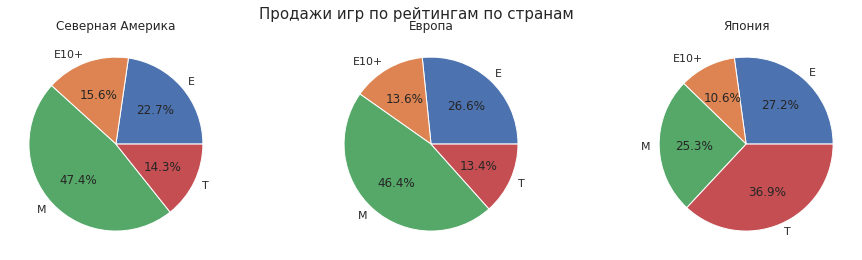

In [74]:
fig = plt.figure(figsize=(16,4))
fig.suptitle('Продажи игр по рейтингам по странам', fontsize=15)
ax1 = plt.subplot(131)

plt.pie(rating_region['na_sales'], labels=rating_region['rating'], autopct='%1.1f%%')
ax1.set_title('Северная Америка')

ax2 = plt.subplot(132)
plt.pie(rating_region['eu_sales'], labels=rating_region['rating'], autopct='%1.1f%%')
ax2.set_title('Европа')

ax3 = plt.subplot(133)
plt.pie(rating_region['jp_sales'], labels=rating_region['rating'], autopct='%1.1f%%')
ax3.set_title('Япония')
plt.show()



Топ продаж игр следующих рейтингов мы видим в Северной Америке, Европе и Японии в период с 2010 по 2016 год:    
    M (39.2%), M(41.2%), E(35.8%) соответственно.  
Низкие продажи игр следующих рейтингов мы видим в Северной Америке, Европе и Японии:  
    E10+ (16.4%), E10+(14.1%), E10+(9.9%) соответственно.

### Выводы

Было проведено исследование продаж в зависимости от региона в период с 2010 по 2016 год.  
Выявлен топ 5 платформ на рынках Северной Америки (NA), Европы (EU) и Японии (JP) (по убыванию доли продаж):  
    - NA: PS4 - 24%, XOne - 21%, X360 - 18%, PS3 - 14%, 3DS - 8%      
    - EU: PS4 - 35%, PS3 - 17%, XOne - 13%, X360 - 10%, 3DS - 8%     
    - JP: 3DS - 48%, PS3 - 19%, PSV - 13%, PS4 - 9%, WiiU - 7%     
Видим, что во всех трёх регионах доминируют платформы компаний PS и XBox, Средни них в топах продаж как платформы нового поколения PS4 и XOne,
так и старого поколения PS3 и X360. В Японии трнеды схожи, но там на рынке практически отсутствует XBox и среди всех доминирует платформа 3DS.  

Выявлен топ 5 жанров на рынках Северной Америки (NA), Европы (EU) и Японии (JP) (по убыванию доли продаж):   
    - NA: Action - 28%, Shooter - 25%, Sports - 15%, Role-Playing - 10% , Misc - 6%  
    - EU: Action - 30%, Shooter - 22%, Sports - 15%, Role-Playing - 9%, Racing - 5%    
    - JP: Role-Playing - 36%, Action - 28%, Misc - 6%, Fighting - 5%, Racing - 4%    
Видим, что во всех трёх регионах присутствует жанр Action, Role-Playing. В NA и EU также пересечения по жанрам Shooter, Sports    

Выявлен топ рейтингов на рынках Северной Америки (NA), Европы (EU) и Японии (JP) (по убыванию доли продаж):   
    - NA: M - 47%,  E - 22%, E10+ - 15% , T - 14%  
    - EU: M - 46%, E - 26%,  T - 13%, E10+ - 13%   
    - JP: T - 37%, E - 27%, M - 25%, E10+ - 10%     
Видим, что во всех трёх регионах в топ 2 игры рейтинга Е (для всех), хуже всего продаются игры рейтинга Е10+ (старше 10 лет). В NA и EU также пересечения по рейтингу М (для взрослых) - он на первом месте в этих регионах.       


Сопоставляя результаты можно сформулировать следующее предложение для создание нового продукта:   
    - игры в жанре Action и Role-Playing популярны во всех странах, в NA и EU топ продаж включает в себя ещё Shooter и Sports  
    - пользуются спросом игры рейтинга E (для всех), в NA и EU топ продаж включает в себя игры рейтина М. 
    - во всех рассматриваемых странах лучше всего продаются игры на PS3 и PS4, В NA и EU также популярны игры на платформах X360 и XOne.
    

### Проверьте гипотезы

In [75]:
#Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

In [76]:
#выделим в отдельные таблицы выборки по Xbox One и PC и исключим пропуски

data_xone = data_now.query('platform == "XOne"')


data_pc = data_now.query('platform == "PC"')


У нас есть две независимых друг от друга выборки на 182 и 375 записей.

Сформулируем нулевую гипотезу:  
H0 - средние пользовательских оценок игр на PC и XOne равны  
Сформулируем альтернативную гипотезу:  
H1 - средние пользовательских оценок игр на PC и XOne не равны  

Для рассчёта p-value воспользуемся методом st.ttest_ind, где задаём уровень значимости альфа равным 0.05

In [77]:
results = st.ttest_ind(data_xone['user_score'], data_pc['user_score'], equal_var=False, nan_policy = 'omit')
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.1475959401343032
Не получилось отвергнуть нулевую гипотезу


In [78]:
display(data_xone['user_score'].mean(), data_pc['user_score'].mean())

6.521428571428572

6.269677419354839

Проверка не отвергла нулевую гипотезу(p-value (0.14) больше значения альфа), есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [79]:
#Средние пользовательские рейтинги жанров Action 
#(англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [80]:
data_act = data_now.query('genre == "Action"')

data_sport = data_now.query('genre == "Sports"')


У нас есть две независимых друг от друга выборки на 779 и 315 записей.

Сформулируем нулевую гипотезу:  
H0 - средние пользовательских оценок игр жанра Action  и Sports равны  
Сформулируем альтернативную гипотезу:  
H1 - средние пользовательских оценок игр жанра Action  и Sports не равны 

Для рассчёта p-value воспользуемся методом st.ttest_ind, где задаём уровень значимости альфа равным 0.05

In [81]:
results = st.ttest_ind(data_act['user_score'], data_sport['user_score'], equal_var=False, nan_policy = 'omit')
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4460039700703482e-20
Отвергаем нулевую гипотезу


Проверка отвергла нулевую гипотезу (p-value (1.4e-20) меньше значения альфа), есть основания говорить, что средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод

Были проверены следующие гипотезы:  
    1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.      
    Проверка проходила по критерию Стьюдента, при уровне значимости альфа равном 0.05. За нулевую гипотезу было принято равенство средних пользовательских рейтингов, за альтернативную - различие.   
    Проверка не отвергла нулевую гипотезу(p-value (0.14) больше значения альфа), есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
    2) Средние пользовательские рейтинги жанров Action  и Sports разные.   
    Проверка проходила по критерию Стьюдента, при уровне значимости альфа равном 0.05. За нулевую гипотезу было принято равенство средних пользовательских рейтингов, за альтернативную - различие.   
    Проверка отвергла нулевую гипотезу (p-value (1.4e-20) меньше значения альфа), есть основания говорить, что средние пользовательские рейтинги жанров Action  и Sports разные.
    

### Напишите общий вывод

Данный проект представляет собой исследование рынка игр на основе исторических данных из открытых источников, представленных в виде таблицы. 
Целью исследования является формулирование рекомендаций для создания потенциально успешного продукта и планирования поддерживающей его рекламной компании.  

Работа проходила в несколько этапов, на каждом из которых обозначены характерные особенности и закономерности.  
1) Ознакомление данными.    
Было проведено ознакомление с составом таблицы. В ней находится 16715 записей об играх по 11 характеристикам:  
— название игры  
— платформа  
— год выпуска  
— жанр игры  
— продажи в Северной Америке (миллионы проданных копий)  
— продажи в Европе (миллионы проданных копий)  
— продажи в Японии (миллионы проданных копий)  
— продажи в других странах (миллионы проданных копий)  
— оценка критиков (максимум 100)  
— оценка пользователей (максимум 10)  
— рейтинг от организации ESRB  

В таблице не было обнаружено дублирующихся записей.     
Были найдены пропущенные значения в столбцах с критическими и пользовательскими оценками, а также с рейтингами игр (вплоть до 50% пропусков).          
2) Предобработка данных.  
Была проведена подготовка данных к исследованию:
- был добавлен столбец с суммарными продажами  игр во всех регионах  
- удалены пропуски, где это возможно, и удалён один неявный дубль    
- изменены типы данных в столбцах, где это уместно и согласовано с будущими вычислениями        
- заменены значения tbd в столбце user_score, RP в столбце rating на отстутствующие значения NaN, заменены устаревшие рейтинги на актуальные.        
3) Исследовательский анализ
- в таблице представленны наблюдения от 1980 года. 99% игр выпущено с 1996 года. Было замечено падение в продажах игр с 2011 года. Можем предпопложить, что это связано с распространением мобильных игр, которые не были учтены при сборе информации.      
- обнаружены 31 уникальная игровая платформа    
- обнаружено 12 уникальных жанров игр  
- всего рассматриваем 4 категорий рейтингов игр  
- распределения оценко критиков и игроков имеют нормальный вид с небольшим скосом влево. Выявлено малое количество аномальных значений (около 3%)  
- распределение продаж во всех регионах демонстрирует широкий разброс. Большое количество выбросов (вплоть до 40%) влияет на вид распределения продаж по кличеству проданных копий (скошены вправо)   


4) Далее был проведён общий анализ продаж игр по годам, по платформам и по жанрам. Были выявлены следующие особенности:    
    
- Были построенны графики продаж игр по платформам, распределённые по годам. 
Оценочно, цикл жизни игровых платформ совершается в промежутке от 5 до 10 лет.        
- Была выявлена пятёрка актуальных на 2016 год платформ. 
По ним определили актуальный период для наблюдений за динамикой развития их продаж: с 2013 по 2016 год.        
- В пятёрку актуальных лидеров вошли следующие платформы: PS4, 3DS, XBox One, WiiU, PC. 
    Среди них лидируют по продажам платформы PS4 и XBox One (они же демонстрируют положительную динамику на 2015 год), низкие продажи и стабильную отрицательную динамику демонстрирует платформа WiiU и 3DS. Важно наблюдение о платформе PC: несмотря на плавную отрицательную динамику в продажах, PC присутствует на рынке более 30-ти лет и является самой стабильной платформой для продаж из всех перечисленных.  
- Среди пятёрки топовых платформ самые высокие медианные продажи у платформ  PS4(0.2 млн), XBox One (0.22 млн) и WiiU (0.22 млн). 
Самая низкая медиана продаж - у PC (0.08 млн)  
- Для выявления закономерности влияния отзывов на количество продаж исследовали историю продаж игр на платформе PS4. 
Пользовательские отзывы не влияют на продажи (коэффициент корреляции 0.032), критические отзывы влияют положительно, но слабо (коэффициент корреляции 0.26).  
- Выявленная закономерность влияния отзывов на продажи справедлива и для остальных платформ. 
Исключениями стали отзывы игроков WiiU (корреляция 0.41) и 3DS (корреляция 0.24), где заметна положительная корреляция продаж от отзывов игроков.  
- Было рассмотрено распределение продаж по жанрам. Самые высокие медианные продажи демонстрирует жанр Shooter( 0.495 млн.), Platform (0.26 млн) и Sports (0.275 млн.), самые низкие медианные продажи - Strategy (0.08 млн)  и Adventure (0.06 млн.).  
  
5) Было проведено исследование продаж в зависимости от региона в период с 2010 по 2016 год.  
Выявлен топ 5 платформ на рынках Северной Америки (NA), Европы (EU) и Японии (JP) (по убыванию доли продаж):  
    - NA: PS4 - 24%, XOne - 21%, X360 - 18%, PS3 - 14%, 3DS - 8%      
    - EU: PS4 - 35%, PS3 - 17%, XOne - 13%, X360 - 10%, 3DS - 8%     
    - JP: 3DS - 48%, PS3 - 19%, PSV - 13%, PS4 - 9%, WiiU - 7%     
Видим, что во всех трёх регионах доминируют платформы компаний PS и XBox, Средни них в топах продаж как платформы нового поколения PS4 и XOne,
так и старого поколения PS3 и X360. В Японии трнеды схожи, но там на рынке практически отсутствует XBox и среди всех доминирует платформа 3DS.  

Выявлен топ 5 жанров на рынках Северной Америки (NA), Европы (EU) и Японии (JP) (по убыванию доли продаж):     
    - NA: Action - 28%, Shooter - 25%, Sports - 15%, Role-Playing - 10% , Misc - 6%  
    - EU: Action - 30%, Shooter - 22%, Sports - 15%, Role-Playing - 9%, Racing - 5%    
    - JP: Role-Playing - 36%, Action - 28%, Misc - 6%, Fighting - 5%, Racing - 4%    
Видим, что во всех трёх регионах присутствует жанр Action, Role-Playing. В NA и EU также пересечения по жанрам Shooter, Sports    

Выявлен топ рейтингов на рынках Северной Америки (NA), Европы (EU) и Японии (JP) (по убыванию доли продаж):   
    - NA: M - 47%,  E - 22%, E10+ - 15% , T - 14%  
    - EU: M - 46%, E - 26%,  T - 13%, E10+ - 13%   
    - JP: T - 37%, E - 27%, M - 25%, E10+ - 10%     
Видим, что во всех трёх регионах в топ 2 игры рейтинга Е (для всех), хуже всего продаются игры рейтинга Е10+ (старше 10 лет). В NA и EU также пересечения по рейтингу М (для взрослых) - он на первом месте в этих регионах.       


Сопоставляя результаты можно сформулировать следующее предложение для создание нового продукта:   
    - игры в жанре Action и Role-Playing популярны во всех странах, в NA и EU топ продаж включает в себя ещё Shooter и Sports  
    - пользуются спросом игры рейтинга E (для всех), в NA и EU топ продаж включает в себя игры рейтина М. 
    - во всех рассматриваемых странах лучше всего продаются игры на PS3 и PS4, В NA и EU также популярны игры на платформах X360 и XOne. А в Японии высокую популярность имеют игры рейтинга Т (подростки).      
    
    
    
6) В конце исследования проверены следующие гипотезы:  
    1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.      
    Проверка проходила по критерию Стьюдента, при уровне значимости альфа равном 0.05. За нулевую гипотезу было принято равенство средних пользовательских рейтингов, за альтернативную - различие.   
    Проверка не опровергла нулевую гипотезу(p-value (0.14) больше значения альфа), есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
    2) Средние пользовательские рейтинги жанров Action  и Sports разные.   
    Проверка проходила по критерию Стьюдента, при уровне значимости альфа равном 0.05. За нулевую гипотезу было принято равенство средних пользовательских рейтингов, за альтернативную - различие.   
    Проверка отвергла нулевую гипотезу (p-value (1.4e-20) меньше значения альфа), есть основания говорить, что средние пользовательские рейтинги жанров Action  и Sports разные.   
    
Обобщая наши наблюдения можно сформулировать следующие комментарии для разработки успешного продукта:  
    - для разработки игры стоит ориентироваться на платформы PS4 и XBox One - это новое поколение платформ хорошо зарекомендовавших себя фирм. Они же демонстрируют динамичный рост продаж игр в период 2014-2015 год. Также для стабильных продаж можно обратиться к платформе PC.  
    - отзывы критиков умеренно влияют на продажи игр. Соответственно в рекламной кампании стоит обращаться к профессиональным изданиям и критикам игр для публикаций обзоров на выпускаемый продукт.  
    - пользовательский рейтинг слабо влияет на количество продаж  
    - при продумывания жанра игры стоит обратить внимание на жанры Action, Role-Playing, Shooter, Sports - они лидируют по продажам  
    - в среднем пользователи одинаково реагирут на игры на платформах Xbox One и PC.  
    - несмотря на то, что игры жанров Action и Sports находятся в топах продаж, средняя пользовательская оценка сильно различается.  
    
        
    
    
    
    